# **Applied Data Science Capstone by IBM/Coursera**


### **Opening a bar in Monterrey Metropolitan Area**

### Introduction

**Background**<br>
Monterrey Metropolitan area is currently the third largest city in México, behind México City and Guadalajara. Monterrey is a modern city growing at a fast pace, it is home of Tec de Monterrey, the best university in Mexico(I work there) also has automotive and manufacturing clusters, cement and construction clusters, IT cluster, tourism clusters, restaurant and mall plazas. Due to particular cultural aspects of society, people love to go out to restaurants and bars, from Wednesday nights to Sunday afternoon. 

**Clients interested**<br>
Considering the background, it represents an attractive place for investors, particularly for in the restaurant/bar industry. Now, due to the current pandemic, confinement restrictions and physical distancing, it doesn’t seem like a good idea to open a restaurant or a bar, however, it is clear to see that people is eager to go out to these kind of places, now even more than ever.

**Problem or business case**<br>
The intention of this project is make a recommendation of a place to open a restaurant or bar in Monterrey Metropolitan area which is integrated by 12 boroughs. To achieve this, the project will have particular objectives: explore the Monterrey Metropolitan area neighborhoods looking up for zones of interest like universities or plazas. Search for common venues and explore its surroundings. Segment and cluster neighborhoods and particular venues to find those with restaurants or bars. And finally, try to find the current trends in restaurants or bars. (This may or may not be possible given that most of these venues are closed and people is not going out)



## Data preparation

### Loading data

For the project, geographical information about the Monterrey metropolitan area is needed in the first place. Given that there is no budget to buy this information, it is obtained for free from a page called, [GeoNames](http://www.geonames.org/), a geographical database which covers all countries and contains over eleven million placenames that are available for download free of charge. 

In [182]:
import pandas as pd
import numpy as np

df = pd.read_csv("datamx.csv")

df.head()

,Country,Postal Code,Neighborhood,State,State_No,Borough,Borough_No,City,City_No,Latitude,Longitude,Coo_No
0,MX,20000,Zona Centro,Aguascalientes,1,Aguascalientes,1,Aguascalientes,1.0,21.8734,-102.2806,1
1,MX,20010,San Cayetano,Aguascalientes,1,Aguascalientes,1,Aguascalientes,1.0,21.9644,-102.3192,1
2,MX,20010,Colinas del Rio,Aguascalientes,1,Aguascalientes,1,Aguascalientes,1.0,21.9644,-102.3192,1
3,MX,20010,Ramon Romo Franco,Aguascalientes,1,Aguascalientes,1,Aguascalientes,1.0,21.9644,-102.3192,1
4,MX,20010,Las Brisas,Aguascalientes,1,Aguascalientes,1,Aguascalientes,1.0,21.9644,-102.3192,1


In [183]:
df.info() # learn about the records and data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144655 entries, 0 to 144654
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Country       144655 non-null  object 
 1   Postal Code   144655 non-null  int64  
 2   Neighborhood  144655 non-null  object 
 3   State         144655 non-null  object 
 4   State_No      144655 non-null  int64  
 5   Borough       144655 non-null  object 
 6   Borough_No    144655 non-null  int64  
 7   City          50879 non-null   object 
 8   City_No       50879 non-null   float64
 9   Latitude      144655 non-null  float64
 10  Longitude     144655 non-null  float64
 11  Coo_No        144655 non-null  int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 13.2+ MB


The dataset contains México’s geographical information of all states, including the following attributes: 'Country', 'Postal Code', 'Neighborhood', 'State', 'State_No', 'Borough', 'Borough_No', 'City', 'City_No', 'Latitude', 'Longitude', 'Coo_No'. All of these attributes are object or string except for the Postal Code and coordinates which area int and float.

### Data cleaning

Getting the right information is key but it is also essential to perform a quick check for null values, select or drop non-null values.

In [184]:
df.isnull().values.any() # Check for null values

True

In [185]:
df.isnull().sum() # Count null values

Country             0
Postal Code         0
Neighborhood        0
State               0
State_No            0
Borough             0
Borough_No          0
City            93776
City_No         93776
Latitude            0
Longitude           0
Coo_No              0
dtype: int64

In [186]:
df.columns

Index(['Country', 'Postal Code', 'Neighborhood', 'State', 'State_No',
       'Borough', 'Borough_No', 'City', 'City_No', 'Latitude', 'Longitude',
       'Coo_No'],
      dtype='object')

### Data selection

In [0]:
df = df.drop(['State_No','Borough_No', 'City', 'City_No','Coo_No'],axis=1) # drop features not needed

From this dataset not all information is useful and needs to be discarded, but the attributes to be analyzed are: 'Country', 'Neighborhood', 'State', 'Borough', 'Latitude', 'Longitude'. First it’s important to make sure to get the right Country, Mexico in this case, then the State of Nuevo León, which is where Monterrey is located.

In [188]:
df.shape # size of dateset after feature selection

(144655, 7)

In [0]:
df = df[df["State"] == "Nuevo León"] # selecting the right data

In [190]:
df.shape

(4981, 7)

In [191]:
df.dtypes

Country          object
Postal Code       int64
Neighborhood     object
State            object
Borough          object
Latitude        float64
Longitude       float64
dtype: object

In [192]:
df.isnull().values.any() # no more null values

False

### Additional Data

The next piece of information required regarding the location is extracted from a Wikipedia page containing information about Monterrey Metropolitan Area. The main table has: 12 Boroughs, population, total area, human development index, etc. From here it is easy to identify the 3 most important Boroughs by human development index: 'San Pedro Garza García', 'Monterrey', 'San Nicolás de los Garza'

In [193]:
mty = pd.read_html("https://es.wikipedia.org/wiki/Zona_metropolitana_de_Monterrey")[1]
mty

,0,1,2,3,4,5,6,7
0,Número,Municipio,Entidad,Población,Superficie km²,Índice de Desarrollo Humano 2015,Presidente Municipal,Partido gobernante
1,1°,San Pedro Garza García,Nuevo León,123 156,70.8,0.968,Miguel Treviño de Hoyos,Independiente
2,2°,San Nicolás de los Garza,Nuevo León,430 143,60.2,0.916,Zeferino Salgado Almaguer,NaN
3,3°,Monterrey,Nuevo León,1 109 171,324.8,0.903,Adrián de la Garza Santos,NaN
4,4°,Santiago,Nuevo León,42 407,739.2,0.902,Javier Caballero Gaona,NaN
5,5°,Guadalupe,Nuevo León,682 880,117.7,0.897,Maria Cristina Diaz Salazar,NaN
6,6°,Ciudad Apodaca,Nuevo León,597 207,224.7,0.895,Oscar Alberto Cantú García,NaN
7,7°,Cadereyta Jiménez,Nuevo León,95 534,1140.9,0.884,José Santiago Preciado Robles,NaN
8,8°,Santa Catarina,Nuevo León,296 954,915.8,0.866,Héctor Israel Castillo Olivares,NaN
9,9°,Ciudad General Escobedo,Nuevo León,425 148,148.9,0.864,Clara Luz Flores Carrales,NaN


### Data Exploration

Let begin our exploratory analysis

In [194]:
df["Borough"].unique() # know the boroughs

array(['Abasolo', 'Agualeguas', 'Los Aldamas', 'Allende', 'Anáhuac',
       'Apodaca', 'Aramberri', 'Bustamante', 'Cadereyta Jiménez',
       'El Carmen', 'Cerralvo', 'Ciénega de Flores', 'China',
       'Doctor Arroyo', 'Doctor Coss', 'Doctor González', 'Galeana',
       'García', 'San Pedro Garza García', 'General Bravo',
       'General Escobedo', 'General Terán', 'General Treviño',
       'General Zaragoza', 'General Zuazua', 'Guadalupe', 'Los Herreras',
       'Higueras', 'Hualahuises', 'Iturbide', 'Juárez',
       'Lampazos de Naranjo', 'Linares', 'Marín', 'Melchor Ocampo',
       'Mier y Noriega', 'Mina', 'Montemorelos', 'Monterrey', 'Parás',
       'Pesquería', 'Los Ramones', 'Rayones', 'Sabinas Hidalgo',
       'Salinas Victoria', 'San Nicolás de los Garza', 'Hidalgo',
       'Santa Catarina', 'Santiago', 'Vallecillo', 'Villaldama'],
      dtype=object)

In [0]:
boroughs = "Monterrey", "San Pedro Garza García", "San Nicolás de los Garza"
df = df.loc[df["Borough"].isin(boroughs)] # select the three most important boroughs according to Wikipedia

In [196]:
df["Borough"].unique() # quick check

array(['San Pedro Garza García', 'Monterrey', 'San Nicolás de los Garza'],
      dtype=object)

In [197]:
df.head()


,Country,Postal Code,Neighborhood,State,Borough,Latitude,Longitude
86314,MX,66200,San Pedro Garza Garcia Centro,Nuevo León,San Pedro Garza García,25.6837,-100.3766
86315,MX,66210,San Pedro 400 Ampliación Norte,Nuevo León,San Pedro Garza García,25.6572,-100.4027
86316,MX,66210,La Leona,Nuevo León,San Pedro Garza García,25.6446,-100.3748
86317,MX,66210,Unidad Habitacional San Pedro,Nuevo León,San Pedro Garza García,25.6572,-100.4027
86318,MX,66210,San Pedro 400,Nuevo León,San Pedro Garza García,25.6572,-100.4027


In [198]:
df.shape # dataframe size

(1646, 7)

It is important to note that some neighborhoods may have the same Postal Code, therefore all duplicates needs to be eliminated.

In [0]:
df.drop_duplicates(subset="Longitude", keep = "last", inplace=True,ignore_index=True)

In [200]:
df.shape # final dataframe with unique records and features

(146, 7)

In [201]:
df[["Borough",'Neighborhood']].groupby("Borough").count().sort_values(by='Neighborhood', ascending=False) # count the neighborhoods with unqiue coordinates in each borough

,Neighborhood
Borough,
Monterrey,75
San Nicolás de los Garza,63
San Pedro Garza García,8


## Explore neighborhoods and venues in Monterrey

### Map of Monterrey's main neighborhoods

In [202]:
import folium # plotting library

print('Folium installed')

Folium installed


Use geopy library to get the latitude and longitude values of Monterrey:

In [203]:
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

address = 'Monterrey, MX'

geolocator = Nominatim(user_agent="mx_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinates of Monterrey are {}, {}.'.format(latitude, longitude))

The geograpical coordinates of Monterrey are 25.6802019, -100.3152586.


In [204]:
# create map of Monterrey using latitude and longitude values of the neighborgoods in our cleaned dataframe:
map_monterrey = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(df['Latitude'], df['Longitude'], df['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_monterrey)  
map_monterrey

It is clear to see that some areas have missing neighborhoods but that is due to the geographical information of the dataset.

### Foursquare Data

In [0]:
CLIENT_ID = '' # your Foursquare ID
CLIENT_SECRET = '' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

In [0]:
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 500 # define radius

Function to get venues in Monterrey

In [0]:
import requests # library to handle requests

def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

The main attributes 'Neighborhood', 'Latitude' and 'Longitude' are used to make the Foursquare queries. 

In [102]:
monterrey_venues = getNearbyVenues(names=df['Neighborhood'],
                                   latitudes=df['Latitude'],
                                   longitudes=df['Longitude']
                                  ) # call the function using the atributes of our dataframe

Residencial San Carlos
Rincón de Corregidora
Zona Antigua Exhacienda Carrizalejo
Punto Central
Loma Blanca
Valle de San Ángel Sect Mexicano
Colinas de San Ángel 2do Sector
Residencial Chipinque 1 Sector
El Mirador Centro
Barrio Antiguo Cd. Solidaridad
San Bernabe
Barrio del Prado
Mirasol
San Antonio (P-37)
San Bernabé IV (F-124)
Plutarco Elias Calles
San Bernabé (F-51)
Villa Alegre
Abelardo Zapata
Felipe Angeles
5 de Mayo
Central
Lomas de Topo Chico
Conquistadores
Tierra Propia (F-35)
Libertadores de América
23 de Marzo
PROVILEON San Bernabé
Benito Juárez (Tiraderos de Basura)
Gloria Mendiola (Tierra Propia)
1 de Mayo (F-97)
Villa San Ángel Topo Chico
Oscar Herrera Hosking
Héroe de Nacozari
La Meseta
Avila Camacho
Nueva Topo Chico
10 de Junio
Pueblo Quieto
Predio Estrella
Valle Verde 3er Sector
Cumbres San Agustín
Real de Cumbres
Cumbres San Ángel
Misión de las Cumbres
Cumbres Elite
Cumbres Madeira
Cerradas de Cumbres
Colonial Cumbres
Los Altos
UH.Lázaro Cárdenas
Estrella
Heriberto Jar

In [103]:
monterrey_venues.shape

(1516, 7)

In [31]:
monterrey_venues.head() # check data

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Rincón de Corregidora,25.6572,-100.4027,Vinoteca,25.654803,-100.403305,Liquor Store
1,Rincón de Corregidora,25.6572,-100.4027,Benavides,25.654488,-100.402029,Pharmacy
2,Rincón de Corregidora,25.6572,-100.4027,Fonda San Francisco,25.661130,-100.400952,Bistro
3,Rincón de Corregidora,25.6572,-100.4027,Helados Sultana,25.655882,-100.405997,Ice Cream Shop
4,Rincón de Corregidora,25.6572,-100.4027,Farmacias del Ahorro,25.655841,-100.405965,Pharmacy


This information will be of interest for anyone looking for a summary of venues by neighborhoods. For example: Cumbres Elite is a wealthy one, and La Boquilla is near a university.

In [104]:
monterrey_venues[["Neighborhood","Venue"]].groupby("Neighborhood").count().sort_values("Venue", ascending=False).head(10) # count venues in each neighborhgoods (first 10)

,Venue
Neighborhood,
Cumbres Elite,68
La Boquilla,44
Punto Central,36
Rincón del Valle,34
Urdiales,31
Anáhuac Sendero,31
Los Mezquites,31
Viejo Roble,30
Balcones de Galerias,30


How many unique categories can be curated from all the returned venues

In [105]:
monterrey_venues["Venue Category"].nunique()

162

Group the categories and find the total venues in each one:


In [106]:
monterrey_venues[["Venue Category","Venue"]].groupby("Venue Category").count().sort_values("Venue", ascending=False).head(10)

,Venue
Venue Category,
Taco Place,157
Convenience Store,156
Mexican Restaurant,116
Burger Joint,81
Park,56
Pharmacy,55
Pizza Place,47
Seafood Restaurant,42
Gym,41


This is the right city if you love tacos, seven eleven and mexican food!

### Analyze Each Neighborhood

In [107]:
# one hot encoding
monterrey_onehot = pd.get_dummies(monterrey_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
monterrey_onehot['Neighborhood'] = monterrey_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [monterrey_onehot.columns[-1]] + list(monterrey_onehot.columns[:-1])
monterrey_onehot = monterrey_onehot[fixed_columns]

monterrey_onehot.head()

,Yoga Studio,Afghan Restaurant,American Restaurant,Arcade,Argentinian Restaurant,Art Gallery,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Astrologer,Athletics & Sports,BBQ Joint,Bakery,Bar,Baseball Field,Baseball Stadium,Basketball Court,Beer Bar,Beer Garden,Big Box Store,Bike Trail,Bistro,Bookstore,Boutique,Boxing Gym,Brazilian Restaurant,Breakfast Spot,Brewery,Burger Joint,Burrito Place,Bus Station,Bus Stop,Cafeteria,Café,Candy Store,Casino,Cheese Shop,Chinese Restaurant,Clothing Store,Cocktail Bar,...,Public Art,Recreation Center,Restaurant,River,Rock Club,Salad Place,Sandwich Place,Seafood Restaurant,Shipping Store,Shopping Mall,Shopping Plaza,Smoothie Shop,Snack Place,Soccer Field,Soccer Stadium,South American Restaurant,Spa,Sporting Goods Shop,Sports Bar,Sports Club,Stables,Stationery Store,Steakhouse,Supermarket,Sushi Restaurant,Swim School,Taco Place,Tennis Court,Tex-Mex Restaurant,Theater,Theme Park Ride / Attraction,Toy / Game Store,Track,Track Stadium,Trail,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Warehouse Store,Wings Joint
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [36]:
monterrey_onehot.shape

(1516, 162)

Let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category

In [156]:
monterrey_grouped = monterrey_onehot.groupby('Neighborhood').mean().reset_index()
monterrey_grouped

,Neighborhood,Yoga Studio,Afghan Restaurant,American Restaurant,Arcade,Argentinian Restaurant,Art Gallery,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Astrologer,Athletics & Sports,BBQ Joint,Bakery,Bar,Baseball Field,Baseball Stadium,Basketball Court,Beer Bar,Beer Garden,Big Box Store,Bike Trail,Bistro,Bookstore,Boutique,Boxing Gym,Brazilian Restaurant,Breakfast Spot,Brewery,Burger Joint,Burrito Place,Bus Station,Bus Stop,Cafeteria,Café,Candy Store,Casino,Cheese Shop,Chinese Restaurant,Clothing Store,...,Public Art,Recreation Center,Restaurant,River,Rock Club,Salad Place,Sandwich Place,Seafood Restaurant,Shipping Store,Shopping Mall,Shopping Plaza,Smoothie Shop,Snack Place,Soccer Field,Soccer Stadium,South American Restaurant,Spa,Sporting Goods Shop,Sports Bar,Sports Club,Stables,Stationery Store,Steakhouse,Supermarket,Sushi Restaurant,Swim School,Taco Place,Tennis Court,Tex-Mex Restaurant,Theater,Theme Park Ride / Attraction,Toy / Game Store,Track,Track Stadium,Trail,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Warehouse Store,Wings Joint
0,1 de Mayo (F-97),0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
1,23 de Marzo,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.333333,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
2,5 de Mayo,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.111111,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.111111,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
3,Abelardo Zapata,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.200000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
4,Acero,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,Villa San Ángel Topo Chico,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
121,Villas Del Roble,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.071429,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0

Let's print each neighborhood along with the top 10 most common venues

In [157]:
num_top_venues = 10

for hood in monterrey_grouped['Neighborhood']:
    print("---- Neighborhood:"+hood+"----")
    temp = monterrey_grouped[monterrey_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

---- Neighborhood:1 de Mayo (F-97)----
                           venue  freq
0                     Astrologer   1.0
1                    Yoga Studio   0.0
2                       Pharmacy   0.0
3                    Music Venue   0.0
4                         Office   0.0
5           Other Great Outdoors   0.0
6            Outdoor Event Space   0.0
7  Paper / Office Supplies Store   0.0
8                           Park   0.0
9                    Pastry Shop   0.0


---- Neighborhood:23 de Marzo----
                           venue  freq
0              Convenience Store  0.33
1                   Costume Shop  0.33
2                     Taco Place  0.33
3                    Yoga Studio  0.00
4                      Pet Store  0.00
5                         Office  0.00
6           Other Great Outdoors  0.00
7            Outdoor Event Space  0.00
8  Paper / Office Supplies Store  0.00
9                           Park  0.00


---- Neighborhood:5 de Mayo----
                           venue 

Function to sort the venues in descending order.

In [0]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

Let's create the new dataframe and display the top 10 venues for each neighborhood.

In [0]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = monterrey_grouped['Neighborhood']

for ind in np.arange(monterrey_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(monterrey_grouped.iloc[ind, :], num_top_venues)


In [112]:
neighborhoods_venues_sorted.Neighborhood.unique() # display unique neighborhoods

array(['1 de Mayo (F-97)', '23 de Marzo', '5 de Mayo', 'Abelardo Zapata',
       'Acero', 'Anáhuac Sendero', 'Anáhuac la Escondida',
       'Avila Camacho', 'Balcones de Anáhuac', 'Balcones de Galerias',
       'Barragán', 'Barrio Antiguo Cd. Solidaridad', 'Barrio del Prado',
       'Benito Juárez (Tiraderos de Basura)',
       'Bosques del Roble Sector 2', 'Casa Bella Sector 2 1a Etapa',
       'Central', 'Centrika 2 Sector',
       'Centro de Desarrollo Comunitario CEDECO', 'Cerradas de Cumbres',
       'Colinas de Anahuac', 'Colinas de San Ángel 2do Sector',
       'Colonial Cumbres', 'Congregación Mariano Escobedo',
       'Conquistadores', 'Contry Sur', 'Cuauhtémoc Sector 3',
       'Cumbres Elite', 'Cumbres Madeira', 'Cumbres San Agustín',
       'Cumbres San Ángel', 'El Barro', 'El Fundador',
       'El Mirador Centro', 'El Naranjal', 'El Refugio Sector 1',
       'Estación Ramon Treviño', 'Estrella', 'Felipe Angeles',
       'Fomerrey 119', 'Francisco I Madero', 'Getsemani',
  

### Look up for venues in a certain neighborhood (near Tec de Monterrey university)

In [113]:
lookup_venues_in_neighborhood = "La Boquilla" # indicate a neighborhood to lookup for its 10 most common venues

neighborhoods_venues_sorted[neighborhoods_venues_sorted["Neighborhood"] == lookup_venues_in_neighborhood]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
53,La Boquilla,Mexican Restaurant,Taco Place,Convenience Store,Restaurant,Burger Joint,Hot Dog Joint,Park,Ice Cream Shop,Cosmetics Shop,Dance Studio


Seems that bar places are not that common here

Get geographical coordinates of the indicated neighborhood

In [114]:
row = df[df["Neighborhood"] == lookup_venues_in_neighborhood].index.values # get the row index for that neighborhood
row

array([68])

In [115]:
latitude_q = df.loc[int(row),"Latitude"] # get the latitude
latitude_q

25.65

In [116]:
longitude_q = df.loc[int(row),"Longitude"] # get the longitude
longitude_q

-100.2833

### Search a venue category in that neighborhood (we are interested in restaurant or bars)

In [0]:
search_query = "Restaurant" # indicate the venue category to search
radius_q = 1000
LIMIT_q = 30

url_q = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude_q, longitude_q, VERSION, search_query, radius_q, LIMIT_q)

In [118]:
results = requests.get(url_q).json()
results

{'meta': {'code': 200, 'requestId': '5ed1c8d8c94979001b17779c'},
 'response': {'venues': [{'categories': [{'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/default_',
       'suffix': '.png'},
      'id': '4bf58dd8d48988d1c4941735',
      'name': 'Restaurant',
      'pluralName': 'Restaurants',
      'primary': True,
      'shortName': 'Restaurant'}],
    'hasPerk': False,
    'id': '5339eacb498e5f891d1f336e',
    'location': {'address': 'Av.Ricardo Covarrubias 3327',
     'cc': 'MX',
     'city': 'Monterrey',
     'country': 'México',
     'distance': 406,
     'formattedAddress': ['Av.Ricardo Covarrubias 3327',
      'Monterrey, Nuevo León',
      'México'],
     'labeledLatLngs': [{'label': 'display',
       'lat': 25.652403,
       'lng': -100.280247}],
     'lat': 25.652403,
     'lng': -100.280247,
     'state': 'Nuevo León'},
    'name': "Jerry's home restaurant",
    'referralId': 'v-1590806777'},
   {'categories': [{'icon': {'prefix': 'https://ss3.4sqi.net/img/c

Transform data

In [0]:
# tranforming json file into a pandas dataframe library
from pandas import json_normalize

# assign relevant part of JSON to venues
venues = results['response']['venues']

# tranform venues into a dataframe
dataframe = json_normalize(venues)

Names of particular venues in the results (competition)

In [120]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered = dataframe.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]

dataframe_filtered.sort_values(by="distance", ascending=True) # sort by distance

,name,categories,address,lat,lng,labeledLatLngs,distance,cc,city,state,country,formattedAddress,crossStreet,postalCode,id
9,La Ezquina,Mexican Restaurant,Junco de la Vega 8,25.649799,-100.286705,"[{'label': 'display', 'lat': 25.64979889993970...",342,MX,Monterrey,Nuevo León,México,[Junco de la Vega 8 (e/ Av. Luis Elizondo y Gu...,e/ Av. Luis Elizondo y Guayana,64840,4da4a5f59aa4721e6e6c3c1a
0,Jerry's home restaurant,Restaurant,Av.Ricardo Covarrubias 3327,25.652403,-100.280247,"[{'label': 'display', 'lat': 25.652403, 'lng':...",406,MX,Monterrey,Nuevo León,México,"[Av.Ricardo Covarrubias 3327, Monterrey, Nuevo...",NaN,NaN,5339eacb498e5f891d1f336e
5,Restaurante Chely,Restaurant,NaN,25.657289,-100.284155,"[{'label': 'display', 'lat': 25.65728938711634...",815,MX,Monterrey,Nuevo León,México,"[Monterrey, Nuevo León, México]",NaN,NaN,4fa2d5f4e4b04c7031748cac
4,Olive Garden,Italian Restaurant,Av. Revolución 2703,25.653209,-100.275706,"[{'label': 'display', 'lat': 25.65320858105013...",841,MX,Monterrey,Nuevo León,México,"[Av. Revolución 2703, 64830 Monterrey, Nuevo L...",NaN,64830,546a5b1c498ea689c684b7c1
7,P.F. Chang's,Chinese Restaurant,"Av. Revolución 2703, Local R-08",25.653416,-100.275009,"[{'label': 'display', 'lat': 25.65341585531093...",914,MX,Monterrey,Nuevo León,México,"[Av. Revolución 2703, Local R-08, 64830 Monter...",NaN,64830,54331a1c498e9bcafb7d8660
3,restaurante Hare Krishna TEC,Vegetarian / Vegan Restaurant,NaN,25.650409,-100.292515,"[{'label': 'display', 'lat': 25.65040904796382...",925,MX,NaN,NaN,México,[México],NaN,NaN,52f3ec14498e8032041865bb
2,Yummy's restaurant,Mexican Restaurant,av del estado 202a,25.650688,-100.293364,"[{'label': 'display', 'lat': 25.65068766796264...",1012,MX,Monterrey,Nuevo León,México,[av del estado 202a (frente a farmacia guadala...,frente a farmacia guadalajara,NaN,516d9441e4b06da2d2c94fd8
8,La Charanda,Beer Garden,Filósofos 106,25.650812,-100.293401,"[{'label': 'display', 'lat': 25.65081165731639...",1017,MX,Monterrey,Nuevo León,México,"[Filósofos 106 (Av. Del Estado), 64700 Monterr...",Av. Del Estado,64700,4e914e7f775bfdaabcac08a2
1,Báltica Restaurant,Seafood Restaurant,Junco de la Vega Col. Roma,25.654656,-100.292334,"[{'label': 'display', 'lat': 25.65465550000000...",1044,MX,Monterrey,Nuevo León,México,"[Junco de la Vega Col. Roma (2 de Abril), Mont...",2 de Abril,NaN,4e039342d22d4cebf37063e8
10,Big Ben Restaurante,Wings Joint,Avenida Luis Elizondo,25.645744,-100.292572,"[{'label': 'display', 'lat': 25.645744, 'lng':...",1044,MX,Monterrey,Nuevo León,México,"[Avenida Luis Elizondo (Río Panuco), Monterrey...",Río Panuco,NaN,522a889011d23abba17b794c


### Search for trending venues in that neighborhood

In [121]:
# define URL
url_t = 'https://api.foursquare.com/v2/venues/trending?client_id={}&client_secret={}&ll={},{}&v={}'.format(CLIENT_ID, CLIENT_SECRET, latitude_q, longitude_q, VERSION)

# send GET request and get trending venues
results = requests.get(url_t).json()
results

{'meta': {'code': 200, 'requestId': '5ed1c747aba297001b38b3a3'},
 'response': {'venues': []}}

In [0]:
if len(results['response']['venues']) == 0:
    trending_venues_df = 'No trending venues are available at the moment!'
    
else:
    trending_venues = results['response']['venues']
    trending_venues_df = json_normalize(trending_venues)

    # filter columns
    columns_filtered = ['name', 'categories'] + ['location.distance', 'location.city', 'location.postalCode', 'location.state', 'location.country', 'location.lat', 'location.lng']
    trending_venues_df = trending_venues_df.loc[:, columns_filtered]

    # filter the category for each row
    trending_venues_df['categories'] = trending_venues_df.apply(get_category_type, axis=1)

In [123]:
# display trending venues
trending_venues_df

'No trending venues are available at the moment!'

 Seems that the confinment measures due to COVID-19 are affecting the trending places 

## Cluster Neighborhoods

First evaluate to find the best Ks

In [160]:
# import k-means for clustering
from sklearn.cluster import KMeans

# find the best k (number of clusters) regarding the inertia_ score
monterrey_grouped_clustering = monterrey_grouped.drop('Neighborhood', 1)

Ks = 60 # number of ks we will test
inertias = np.zeros((Ks-1))
for n in range(1,Ks):
    
    # run k-means clustering
    kmeans = KMeans(n_clusters=n, random_state=0, n_init = 12).fit(monterrey_grouped_clustering)
    inertias[n-1] = kmeans.inertia_

# display the inertia    
inertias

array([26.74433465, 23.70207633, 21.62443692, 20.01863573, 18.88812705,
       17.84033729, 16.82387305, 15.99112887, 15.24018819, 14.81832558,
       14.00484231, 12.97582832, 12.57859714, 12.24219624, 11.869374  ,
       11.61420913, 10.93417413, 10.54425645, 10.23934596,  9.91136011,
        9.59362824,  9.28671387,  8.92631852,  8.57912481,  8.29754671,
        8.1394114 ,  7.8894114 ,  7.6601808 ,  7.37319887,  7.1526092 ,
        6.94613182,  6.69071475,  6.45369127,  6.17803077,  5.9310052 ,
        5.76816497,  5.53122161,  5.29885284,  5.13978832,  4.86588634,
        4.75477523,  4.63810373,  4.47694919,  4.30483415,  4.16695423,
        4.04609501,  3.90882139,  3.73206543,  3.61781501,  3.49676585,
        3.403022  ,  3.31116372,  3.18086922,  3.06226802,  3.02912881,
        2.92005316,  2.82817444,  2.76393621,  2.64327129])

Plot the inertias 

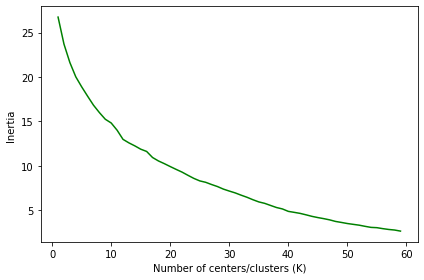

In [161]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(range(1,Ks),inertias,'g') # plot the inertia with ks to find the better balance
plt.ylabel('Inertia ')
plt.xlabel('Number of centers/clusters (K)')
plt.tight_layout()
plt.show()

Run k-means to cluster the neighborhood into 18 clusters.

In [162]:
# Choose 18 as it seems a good balance between clustering reliability and inertia score
kclusters = 18

monterrey_grouped_clustering = monterrey_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(monterrey_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:20]

array([ 7,  8,  4,  1,  1, 13,  1,  8,  1,  3,  8, 13,  1, 12,  4,  4, 10,
       13,  4,  1], dtype=int32)

Let's create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.

In [163]:
neighborhoods_venues_sorted.columns

# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

monterrey_merged = df

# merge monterrey_grouped with monterrey_data to add latitude/longitude for each neighborhood
monterrey_merged = monterrey_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

monterrey_merged.head() 

,Country,Postal Code,Neighborhood,State,Borough,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,MX,66228,Residencial San Carlos,Nuevo León,San Pedro Garza García,25.8236,-100.4087,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,MX,66239,Rincón de Corregidora,Nuevo León,San Pedro Garza García,25.6572,-100.4027,1.0,Pharmacy,Massage Studio,Tennis Court,Convenience Store,Park,Burrito Place,Bistro,Liquor Store,Jewelry Store,Pizza Place
2,MX,66259,Zona Antigua Exhacienda Carrizalejo,Nuevo León,San Pedro Garza García,25.7830,-100.3094,4.0,Convenience Store,Park,Mexican Restaurant,Seafood Restaurant,Gym,Snack Place,Pharmacy,Track,Frozen Yogurt Shop,Taco Place
3,MX,66279,Punto Central,Nuevo León,San Pedro Garza García,25.6837,-100.3766,13.0,Taco Place,Burger Joint,Mexican Restaurant,Ice Cream Shop,Argentinian Restaurant,Restaurant,Wings Joint,Pizza Place,Pharmacy,Mobile Phone Shop
4,MX,66290,Loma Blanca,Nuevo León,San Pedro Garza García,25.6446,-100.3748,16.0,Park,Movie Theater,Martial Arts Dojo,Exhibit,Event Space,Electronics Store,Dog Run,Dive Bar,Diner,Dessert Shop


Seems that some neighborhoods do not have cluster info

In [165]:
monterrey_merged.isnull().sum()

Country                    0
Postal Code                0
Neighborhood               0
State                      0
Borough                    0
Latitude                   0
Longitude                  0
Cluster Labels            21
1st Most Common Venue     21
2nd Most Common Venue     21
3rd Most Common Venue     21
4th Most Common Venue     21
5th Most Common Venue     21
6th Most Common Venue     21
7th Most Common Venue     21
8th Most Common Venue     21
9th Most Common Venue     21
10th Most Common Venue    21
dtype: int64

In [0]:
monterrey_merged = monterrey_merged.dropna() # drop those with missing info

In [167]:
monterrey_merged.isnull().sum()

Country                   0
Postal Code               0
Neighborhood              0
State                     0
Borough                   0
Latitude                  0
Longitude                 0
Cluster Labels            0
1st Most Common Venue     0
2nd Most Common Venue     0
3rd Most Common Venue     0
4th Most Common Venue     0
5th Most Common Venue     0
6th Most Common Venue     0
7th Most Common Venue     0
8th Most Common Venue     0
9th Most Common Venue     0
10th Most Common Venue    0
dtype: int64

### Map of Monterrey's clustered neighborhoods

In [168]:
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=12)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(monterrey_merged['Latitude'], monterrey_merged['Longitude'], monterrey_merged['Neighborhood'], monterrey_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(cluster)-1],
        fill=True,
        fill_color=rainbow[int(cluster)-1],
        fill_opacity=0.7).add_to(map_clusters)
       
display(map_clusters)

### Cluster examination

Let's count the total number of venues in each cluster

In [170]:
monterrey_merged.iloc[:,7:9].groupby("Cluster Labels").count().sort_values("1st Most Common Venue", ascending=False).head(10)

,1st Most Common Venue
Cluster Labels,
13.0,32
4.0,24
1.0,20
8.0,13
3.0,11
2.0,7
16.0,3
7.0,3
10.0,3


Now, we examine some clusters and assign a name based on its most common venues

Cluster 1: Convenience Stores and Pharmacies

In [177]:
monterrey_merged.loc[monterrey_merged['Cluster Labels'] == 1, monterrey_merged.columns[[1] + list(range(2, monterrey_merged.shape[1]))]].head()

,Postal Code,Neighborhood,State,Borough,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,66239,Rincón de Corregidora,Nuevo León,San Pedro Garza García,25.6572,-100.4027,1.0,Pharmacy,Massage Studio,Tennis Court,Convenience Store,Park,Burrito Place,Bistro,Liquor Store,Jewelry Store,Pizza Place
11,64102,Barrio del Prado,Nuevo León,Monterrey,25.7825,-100.3936,1.0,Shopping Mall,Convenience Store,Pharmacy,Department Store,Wings Joint,Electronics Store,Dog Run,Dive Bar,Diner,Dessert Shop
15,64108,Plutarco Elias Calles,Nuevo León,Monterrey,25.7535,-100.3913,1.0,Restaurant,Convenience Store,Office,Bus Stop,Wings Joint,Department Store,Electronics Store,Dog Run,Dive Bar,Diner
18,64168,Abelardo Zapata,Nuevo León,Monterrey,25.7774,-100.3812,1.0,Electronics Store,Pizza Place,Grocery Store,Convenience Store,Supermarket,Wings Joint,Dance Studio,Dog Run,Dive Bar,Diner
41,64346,Cumbres San Agustín,Nuevo León,Monterrey,25.7640,-100.4176,1.0,Convenience Store,Sandwich Place,Taco Place,Pet Store,Soccer Field,Pharmacy,Seafood Restaurant,Burger Joint,Stationery Store,Restaurant


Cluster 2: Mexican, Sea food and Wings restaurants

In [173]:
monterrey_merged.loc[monterrey_merged['Cluster Labels'] == 2, monterrey_merged.columns[[1] + list(range(2, monterrey_merged.shape[1]))]].head()

,Postal Code,Neighborhood,State,Borough,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
23,64208,Conquistadores,Nuevo León,Monterrey,25.7907,-100.3807,2.0,Mexican Restaurant,Food Truck,Wings Joint,Dessert Shop,Exhibit,Event Space,Electronics Store,Dog Run,Dive Bar,Diner
24,64209,Tierra Propia (F-35),Nuevo León,Monterrey,25.7877,-100.3761,2.0,Mexican Restaurant,Pizza Place,Wings Joint,Department Store,Event Space,Electronics Store,Dog Run,Dive Bar,Diner,Dessert Shop
27,64217,PROVILEON San Bernabé,Nuevo León,Monterrey,25.9379,-100.3574,2.0,Plaza,Mexican Restaurant,Seafood Restaurant,Wings Joint,Department Store,Event Space,Electronics Store,Dog Run,Dive Bar,Diner
52,64429,Heriberto Jara,Nuevo León,Monterrey,25.6472,-100.0958,2.0,Mexican Restaurant,Burrito Place,Seafood Restaurant,Wings Joint,Event Space,Electronics Store,Dog Run,Dive Bar,Diner,Dessert Shop
66,64723,Unión Loma Larga,Nuevo León,Monterrey,25.6592,-100.3242,2.0,Mexican Restaurant,Dessert Shop,Convenience Store,Wings Joint,Exhibit,Event Space,Electronics Store,Dog Run,Dive Bar,Diner


Cluster 3: Movie theaters, Mexican restaurants and Candy stores

In [174]:
monterrey_merged.loc[monterrey_merged['Cluster Labels'] == 3, monterrey_merged.columns[[1] + list(range(2, monterrey_merged.shape[1]))]].head()

,Postal Code,Neighborhood,State,Borough,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
8,64070,El Mirador Centro,Nuevo León,Monterrey,25.7334,-100.3321,3.0,Movie Theater,Afghan Restaurant,Candy Store,Juice Bar,Motel,Dessert Shop,Fast Food Restaurant,Exhibit,Event Space,Electronics Store
10,64100,San Bernabe,Nuevo León,Monterrey,25.7333,-100.3333,3.0,Movie Theater,Afghan Restaurant,Candy Store,Juice Bar,Motel,Dessert Shop,Fast Food Restaurant,Exhibit,Event Space,Electronics Store
12,64102,Mirasol,Nuevo León,Monterrey,25.7676,-100.3891,3.0,Mexican Restaurant,Candy Store,Brewery,Wings Joint,Dessert Shop,Exhibit,Event Space,Electronics Store,Dog Run,Dive Bar
40,64339,Valle Verde 3er Sector,Nuevo León,Monterrey,25.7183,-100.3620,3.0,Mexican Restaurant,Juice Bar,Candy Store,Convenience Store,Seafood Restaurant,Big Box Store,Bus Station,Sushi Restaurant,BBQ Joint,Gym
54,64489,Rubén Jaramillo,Nuevo León,Monterrey,25.7050,-100.2841,3.0,Seafood Restaurant,Mexican Restaurant,Chinese Restaurant,Gym,Convenience Store,Furniture / Home Store,Pharmacy,Juice Bar,Taco Place,Dog Run


Let's look up for the cluster label of our neighborhood 

In [180]:
monterrey_merged[["Neighborhood","Cluster Labels"]][monterrey_merged["Neighborhood"] == "La Boquilla"]

,Neighborhood,Cluster Labels
68,La Boquilla,13.0


Cluster 4: Tacos, Athletics and sports (The one with the most neighborhoods and where our neighborhood of interest was assigned)

In [179]:
monterrey_merged.loc[monterrey_merged['Cluster Labels'] == 13, monterrey_merged.columns[[1] + list(range(2, monterrey_merged.shape[1]))]].head()

,Postal Code,Neighborhood,State,Borough,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
3,66279,Punto Central,Nuevo León,San Pedro Garza García,25.6837,-100.3766,13.0,Taco Place,Burger Joint,Mexican Restaurant,Ice Cream Shop,Argentinian Restaurant,Restaurant,Wings Joint,Pizza Place,Pharmacy,Mobile Phone Shop
9,64100,Barrio Antiguo Cd. Solidaridad,Nuevo León,Monterrey,25.7476,-100.3686,13.0,Burger Joint,Soccer Field,Pharmacy,Fried Chicken Joint,Wings Joint,Electronics Store,Dog Run,Dive Bar,Diner,Dessert Shop
33,64260,Héroe de Nacozari,Nuevo León,Monterrey,25.7167,-100.3167,13.0,Athletics & Sports,Park,Tennis Court,Concert Hall,Gym / Fitness Center,Gym,Museum,Recreation Center,Basketball Court,Baseball Stadium
42,64346,Real de Cumbres,Nuevo León,Monterrey,25.7540,-100.4032,13.0,Mexican Restaurant,Pizza Place,Taco Place,Fast Food Restaurant,Burger Joint,Hot Dog Joint,Convenience Store,Café,Pub,Restaurant
45,64349,Cumbres Elite,Nuevo León,Monterrey,25.7401,-100.4056,13.0,Taco Place,Restaurant,Burger Joint,Convenience Store,Wings Joint,Mexican Restaurant,Seafood Restaurant,Sushi Restaurant,Pizza Place,BBQ Joint


Cluster 5: Parks, Tacos and gyms (The second one with the most neighborhoods)

In [181]:
monterrey_merged.loc[monterrey_merged['Cluster Labels'] == 4, monterrey_merged.columns[[1] + list(range(2, monterrey_merged.shape[1]))]].head()

,Postal Code,Neighborhood,State,Borough,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,66259,Zona Antigua Exhacienda Carrizalejo,Nuevo León,San Pedro Garza García,25.7830,-100.3094,4.0,Convenience Store,Park,Mexican Restaurant,Seafood Restaurant,Gym,Snack Place,Pharmacy,Track,Frozen Yogurt Shop,Taco Place
19,64170,Felipe Angeles,Nuevo León,Monterrey,25.7944,-100.4201,4.0,Bakery,Burger Joint,Wings Joint,Dessert Shop,Exhibit,Event Space,Electronics Store,Dog Run,Dive Bar,Diner
20,64186,5 de Mayo,Nuevo León,Monterrey,25.7214,-100.3480,4.0,Pool,Convenience Store,Taco Place,Cycle Studio,Burger Joint,Fast Food Restaurant,Flea Market,Gift Shop,Gym Pool,Dive Bar
36,64266,Nueva Topo Chico,Nuevo León,Monterrey,25.8029,-100.3041,4.0,Park,Taco Place,Warehouse Store,Moving Target,Convenience Store,River,Electronics Store,Dog Run,Dive Bar,Diner
50,64390,UH.Lázaro Cárdenas,Nuevo León,Monterrey,25.7408,-100.3971,4.0,Mexican Restaurant,Convenience Store,Taco Place,Comfort Food Restaurant,Gym,Coffee Shop,Ice Cream Shop,Pizza Place,Martial Arts Dojo,Park


### Results and recommendations

### Neighborhood and venues exploration, search and clustering:


*   It is interesting to see that the neighborhood with more venues are the wealthy ones.
*   Taco Place, Convenience Store, Mexican Restaurant, Burger Joint	and Park categories are the most popular
*   La Boquilla neighborhood near the university does not have bars in the 10 most popular venues, however, it has more than 30 bars near (1000 meters).
*   Also, it does have less than a docen restaurants near (1000 meters).
*   Near this neighborhood it wasn't possible to find trends in venues. Probably due the current pandemic.
*   Finally, the clusters show an interesting image as most of the neighborhoods have taco places and convenience stores, some others had a variety of restaurants and other parks and athletics venues.






### Recommendations:

*   The dataset with geographical coordinates had several duplicated coordinates, this showed in the map. With more time, it can be possible to create a function or query to get more accurate data. It is clear to see that several important neighborhoods were missing.
*   Based on the exploration and the search, opening a bar in the desired neighborhood is not recommended, as there are many around. However, opening a restaurant or taco place could work as these are the most common venues and there are not a lot of them around.
*   For the clusters, more work needs to be done to find the Ks, becuase as it is, some clusters only have one neighborhood, and others are really far away from each others. This may be because of the missing data from the original dataset.

### Final thoughts

This project was really fun, drilling down into the data, creating groups and subtotals of venues, getting a valuable insight of the most common venues in a particular neighborhood, having the ability to search for a particular venue in a certain place and finally clustering and discovering how the landscape looks like to make the right recommendations for clients in your home city.